#### CSCE 670 :: Information Storage and Retrieval :: Texas A&M University :: Spring 2018


# Homework 1:  Basic Machine Learning + Learning to Rank 

### 100 points [5% of your final grade]

### Due: Monday, February 12 by 11:59pm

*Goals of this homework:* In this homework you will get hands-on experience with (i) the basics of machine learning (e.g. train/test data, cross-validation, different classifiers) and interpreting results; and (ii) learning to rank.

*Submission Instructions:* To submit your homework, rename this notebook as UIN_hw#.ipynb. For example, this homework submission would be: YourUIN_hw1.ipynb. Submit this notebook via ecampus. Your notebook should be completely self-contained, with the results visible in the notebook. 

*Late submission policy:* For this homework, you may use up to three of your late days, meaning that no submissions will be accepted after Thursday, February 15 at 11:59pm.

*Collaboration policy:* You are expected to complete each homework independently. Your solution should be written by you without the direct aid or help of anyone else. However, we believe that collaboration and team work are important for facilitating learning, so we encourage you to discuss problems and general problem approaches (but not actual solutions) with your classmates. You may post on Piazza, search StackOverflow, etc. But if you do get help in this way, you must inform us by **filling out the Collaboration Declarations at the bottom of this notebook**. 

*Example: I found helpful code on stackoverflow at https://stackoverflow.com/questions/11764539/writing-fizzbuzz that helped me solve Problem 2.*

The basic rule is that no student should explicitly share a solution with another student (and thereby circumvent the basic learning process), but it is okay to share general approaches, directions, and so on. If you feel like you have an issue that needs clarification, feel free to contact either me or the TA.

# Part 1: Basics of ML (70 points)

For this part, we're going to get familiar with scikit-learn (a great ML toolkit that is very popular) and the major issues in training a model, testing it, and interpreting the results. Our goal in this assignment is to build a classifier to determine if a Yelp review is "food-relevant" or not.

## Dataset: Yelp review data

First, you will need to download the training_data.json file from the Resources tab on Piazza, a collection of 40,000 json-encoded Yelp reviews we sampled from the [Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge).

You'll see that each line corresponds to a review on a particular business. The label (class) information of each review is in the "label" field. It is **either "Food-relevant" or "Food-irrelevant"**.

## Part 1.1: Parsing Yelp (15 points)

For this first part, we will build a parser for extracting tokens from the **review text** only. First, you should tokenize each review using **whitespaces and punctuations as delimiters**. Do not remove stopwords. You should apply casefolding (lower case everything) and use the [nltk Porter stemmer](http://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) ... you may need to install nltk if you don't have it already. 

In [131]:
import nltk
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from string import punctuation
import json
import operator
from sklearn.metrics import classification_report
def clean_data(sentence):
    stemmer=PorterStemmer()
    tokens=word_tokenize(sentence.lower())
    result=[]
    for word in tokens:    
        stemmed_word=stemmer.stem(word)
        if len(stemmed_word)<2:
            continue     
        result.append(stemmed_word)
    return result

def load_data():
    labels=[]
    file_path='training_data.json'
    reviews=[]
    with open(file_path) as fn:
        for row in fn:
            total_content = json.loads(row)
            reviews.append(clean_data(total_content['text']))
            if total_content['label']=='Food-irrelevant':
                labels.append(0)
            elif total_content['label']=='Food-relevant':
                labels.append(1)
    return (reviews,labels)
    
reviews,labels=load_data()

### Unique tokens?

Once you have your parser working, you should report here the size of your feature space. That is, how many unique tokens do you find?

In [132]:
def create_vocab(reviews):
    vocab={}
    for row in reviews:
        for word in row:
            if word not in vocab:
                vocab[word] = 1
            else:
                vocab[word]+=1
    return vocab
        
#reviews=load_data()[0]
vocab=create_vocab(reviews)
vocab

{u'fawn': 7,
 u'circuitri': 1,
 u'gai': 25,
 u'mid-week': 15,
 u'long-sleev': 1,
 u'woodi': 12,
 u'sonja': 1,
 u'*best*': 1,
 u'alphagraph': 2,
 u'suzann': 13,
 u'francesco': 1,
 u'francesca': 4,
 u'northsight': 1,
 u'nieder': 1,
 u'fawk': 1,
 u'frou-frou': 4,
 u'oval/natur': 1,
 u'aileen': 1,
 u'360.00': 1,
 u'scold': 19,
 u'la-wannab': 1,
 u'accret': 1,
 u'crespel': 2,
 u'mustachio': 2,
 u'wrought-iron': 1,
 u'everything.i': 1,
 u'half-tomato': 1,
 u'spagehetti': 2,
 u'course/vac': 1,
 u'foui': 1,
 u'calpico': 5,
 u'age/rac': 1,
 u'button-down': 3,
 u'sharehold': 2,
 u'wood-': 1,
 u'rude.sh': 1,
 u'pigment': 2,
 u'capoeira': 1,
 u'heard/sang': 1,
 u'thinned-down': 1,
 u'strictest': 1,
 u'viewabl': 2,
 u'elvi': 18,
 u'airfar': 1,
 u'broiler': 6,
 u'arizona..and': 1,
 u'wooden': 71,
 u'showcas': 46,
 u'understock': 1,
 u'wednesday': 274,
 u'*food': 2,
 u'tcbi': 9,
 u'high-and-dri': 1,
 u'crotch': 5,
 u'flair..': 1,
 u'redish': 1,
 u'cane-': 1,
 u'vermietst': 2,
 u'everything..': 3,
 u"

### The Most Popular Words

Great, now we can tokenize the documents. Let's make a list of the most popular words in our reviews. For this step, you should maintain a count of how many times each word occurs. Then you should print out the top-20 words in your reviews.

Your output should look like this:

Rank Token Count

1 awesome 78

... ...

In [133]:
vocab_sorted=sorted(vocab.items(), key=operator.itemgetter(1),reverse=True)
count=1
for tup in vocab_sorted[:20]:
    #print count,tup[0],tup[1]
    count+=1
#len(vocab_sorted) #1716
vocab_sorted

[(u'the', 245729),
 (u'and', 168032),
 (u'to', 127570),
 (u'it', 78529),
 (u'wa', 77154),
 (u'of', 76024),
 (u'is', 65155),
 (u'for', 60780),
 (u'in', 59689),
 (u'that', 50726),
 (u'my', 50497),
 (u'you', 45700),
 (u'they', 43485),
 (u'have', 40085),
 (u'thi', 39808),
 (u'with', 39303),
 (u'but', 37754),
 (u'on', 35108),
 (u"'s", 34320),
 (u"n't", 33615),
 (u'we', 31528),
 (u'not', 30354),
 (u'are', 27791),
 (u'had', 27710),
 (u'at', 26684),
 (u'so', 25609),
 (u'be', 25362),
 (u'place', 24930),
 (u'me', 23555),
 (u'there', 22897),
 (u'as', 21171),
 (u'were', 21058),
 (u'good', 20586),
 (u'do', 19921),
 (u'get', 19490),
 (u'time', 19295),
 (u'go', 19288),
 (u'like', 19129),
 (u'...', 18677),
 (u'if', 18495),
 (u'great', 17841),
 (u'all', 17671),
 (u'out', 17670),
 (u'here', 17394),
 (u'food', 17365),
 (u'veri', 16476),
 (u'one', 16284),
 (u'just', 16261),
 (u'when', 15036),
 (u'or', 15035),
 (u'from', 14754),
 (u'would', 14409),
 (u'their', 14196),
 (u'up', 14031),
 (u'about', 13508),
 

### Zipf's Law

Recall in class our discussion of Zipf's law. Let's see if this law applies to our Yelp reviews. You should use matplotlib to plot the log-base10 term counts on the y-axis versus the log-base10 rank on the x-axis. Your aim is to create a figure like the one in Figure 5.2 of the textbook.

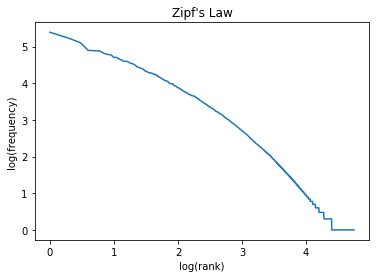

In [134]:
import matplotlib.pyplot as plt
import math
plt. plot([math.log10(r) for r in range(1,len(vocab_sorted)+1)], [math.log10(f[1]) for f in vocab_sorted])
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.title("Zipf's Law")
plt.show()

What do you observe? Is this consistent with Zipf's law?

yes, it is consistent with Zipf's law. I understand how terms are distributed across documents. So if the most frequent term occurs f1 times, then the second most frequent term has half as many occurrences, the third most frequent term a third as many occurrences, and so on. The intuition is that frequency decreases very rapidly with rank and the collection frequency fi of the ith most common term is proportional to 1/i.


## Part 1.2: Feature Represenation (10 points)

In this part you will build feature vectors for each review. This will be input to our ML classifiers. You should call your parser from earlier, using all the same assumptions (e.g., casefolding, stemming). Each feature value should be the term count for that review.

In [135]:
from sklearn.feature_extraction.text import CountVectorizer
def create_vector(train_set,test_set):
    cv = CountVectorizer(encoding='utf-8')
    train_vec=cv.fit_transform(' '.join(s) for s in train_set)
    test_vec=cv.transform(' '.join(s) for s in test_set)
    print (len(cv.get_feature_names()))
    return (train_vec,test_vec)

## Part 1.3: Machine Learning Basics (30 points)

In this part you will evaluate a bunch of classifiers -- kNN, Decision tree, Naive Bayes, and SVM -- on the feature vectors generated in the previous task in two different settings. **You do not need to implement any classifier from scratch. You may use scikit-learn's built-in capabilities.**

### Setting 1: Splitting data into train-test 

In the first setting, you should treat the first 70% of your data as training. The remaining 30% should be for testing. 

### Setting 2: Using 5 fold cross-validation

In the second setting, use 5-folk cross-validation. 

### What to report

* Report the overall accuracy for both settings.
* For the class "Food-relevant", report the precision and recall for both settings.
* For the class "Food-irrelevant", report the precision and recall for both settings.

In [136]:
#SETTING - 1
train_data=reviews[:int(0.7*len(reviews))]
test_data=reviews[int(0.7*len(reviews)):]
X_train_vec,X_test_vec=create_vector(train_data,test_data)
Y_train=labels[:int(0.7*len(reviews))]
Y_test=labels[int(0.7*len(reviews)):]

32191


In [137]:
#KNN
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_vec,Y_train)
predictions=knn.predict(X_test_vec)
target_names = ['Food-irrelevant', 'Food-relevant']
print 'Model Accuracy on Test set is ', metrics.accuracy_score(Y_test, predictions)
print classification_report(Y_test, predictions, target_names=target_names)

Model Accuracy on Test set is  0.32275
                 precision    recall  f1-score   support

Food-irrelevant       1.00      0.31      0.47     11761
  Food-relevant       0.03      0.97      0.05       239

    avg / total       0.98      0.32      0.46     12000



In [138]:
#SVM
from sklearn import svm
linear_svm = svm.LinearSVC()
linear_svm.fit(X_train_vec, Y_train)
predictions = linear_svm.predict(X_test_vec)
print 'Model Accuracy on Test set is ', metrics.accuracy_score(Y_test, predictions)
print classification_report(Y_test, predictions, target_names=target_names)

Model Accuracy on Test set is  0.861833333333
                 precision    recall  f1-score   support

Food-irrelevant       1.00      0.86      0.92     11761
  Food-relevant       0.12      0.98      0.22       239

    avg / total       0.98      0.86      0.91     12000



In [139]:
#DECISION TREE
from sklearn import tree
dec_tree = tree.DecisionTreeClassifier(criterion='gini',max_depth=7)
print 'Model Accuracy on Test set is ', metrics.accuracy_score(Y_test, predictions)

Model Accuracy on Test set is  0.861833333333


In [140]:
#NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_vec,Y_train)
predictions=mnb.predict(X_test_vec)
print 'Model Accuracy on Test set is ', metrics.accuracy_score(Y_test, predictions)
print classification_report(Y_test, predictions, target_names=target_names)

Model Accuracy on Test set is  0.93775
                 precision    recall  f1-score   support

Food-irrelevant       1.00      0.94      0.97     11761
  Food-relevant       0.24      0.98      0.39       239

    avg / total       0.98      0.94      0.96     12000



In [141]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_vec, Y_train)
predictions = logreg.predict(X_test_vec)
print 'Model Accuracy on Test set is ', metrics.accuracy_score(Y_test, predictions)
print classification_report(Y_test, predictions, target_names=target_names)

Model Accuracy on Test set is  0.880916666667
                 precision    recall  f1-score   support

Food-irrelevant       1.00      0.88      0.94     11761
  Food-relevant       0.14      0.99      0.25       239

    avg / total       0.98      0.88      0.92     12000



In [142]:
#SETTING - 2
from sklearn.model_selection import cross_val_score
X_new=reviews
Y_new=labels
cv2 = CountVectorizer(encoding='utf-8')
X_new_vec=cv2.fit_transform(' '.join(s) for s in X_new)

In [143]:
#KNN
scores=cross_val_score(knn,X_new_vec,Y_new,cv=5,scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.75 (+/- 0.06)


In [144]:
#SVM
scores=cross_val_score(linear_svm,X_new_vec,Y_new,cv=5,scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.91 (+/- 0.03)


In [145]:
#Decsion Tree
scores=cross_val_score(dec_tree,X_new_vec,Y_new,cv=5,scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.83 (+/- 0.03)


In [146]:
#NAIVE BAYES
scores=cross_val_score(mnb,X_new_vec,Y_new,cv=5,scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.93 (+/- 0.04)


In [147]:
#Logistic Regression
scores=cross_val_score(logreg,X_new_vec,Y_new,cv=5,scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.93 (+/- 0.03)


## Part 1.4: Analyzing your results (5 points) 

OK, now that you have tried four different classifiers, what do you observe? Any conclusions you can draw? Give us one or two paragraphs summarizing your findings.

I have tried with 5 models. NB has proved to be robust to noise and missing data as it has the ability of performing the probabilities without having any impact on the final outcome.
Despite its powers discussed above, SVM tends to be computationally expensive by virtue of the kernel technique it employs during learning. This however can be minimized during SVM model training and evaluation since the kernel is a parameter that can be adjusted depending on the performance, which eventually reduces computational cost.  outstanding performance of SVM could be attributed to a number factors: majority of TC problems are mostly linearly separable, and SVM employs threshold functions to develop margins that linearly separate the Classes; SVMs tend to use over-fitting protection mechanism that is independent of the dimensionality of the feature space, thus, the number of features tends not to be an issue; and SVMs are well designed to deal with sparseness found in feature vectors.
DT is characterised by its relative transparent outputs, which are easy to be read and understood by humans. DT has been shown to have superior performance over other techniques for this dataset.

Method - Decision Tree
Advantage - Easily pick the best feature from the set of data
Disadvantage - Overfilling is the problem and not so much accurate.

Method - K Nearest Neighbor 
Advantage - even robust to noisy training data.
Disadvantage - Classification time is too long and it is difficult to find the optimal value of k.

Method - Naive Bayes 
Advantage - Easy to implement and it requires less amount of training data.
Disadvantage - The assumption of independence of the class results in loss of accuracy.

Method - SVM
Advantage - Robust and very accurate.
Disadvantage - High algorithmic complexity and extensive memory requirements for large scale task.

## Part 1.5: Improving your classifier (10 points)

I think we can do better! In this part, your job is to create new features that you can think can help improve your classifier. You may choose to use new weightings for your words, new derived features (e.g., count of 3-letter words), or whatever you like. You may also add in the extra features in the json: funny, useful, cool. You will need to experiment with different approaches ... once you finalize on your best approach, include the features here with a description (that is, tell us what the feature means). Then give us your classifier results!

In [148]:
#Instead of count vectorizer using TF-IDF vectorizer and using bi grams, removing stop words
from sklearn.feature_extraction.text import TfidfVectorizer
def create_vector(train_set,test_set):
    tf = TfidfVectorizer(encoding='utf-8',ngram_range=(1, 2),stop_words='english')
    train_vec=tf.fit_transform(' '.join(s) for s in train_set)
    test_vec=tf.transform(' '.join(s) for s in test_set)
    print (len(tf.get_feature_names()))
    return (train_vec,test_vec)

In [149]:
#SETTING - 1
train_data=reviews[:int(0.7*len(reviews))]
test_data=reviews[int(0.7*len(reviews)):]
X_train_vec,X_test_vec=create_vector(train_data,test_data)
Y_train=labels[:int(0.7*len(reviews))]
Y_test=labels[int(0.7*len(reviews)):]   

803313


In [150]:
#KNN
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_vec,Y_train)
predictions=knn.predict(X_test_vec)
target_names = ['Food-irrelevant', 'Food-relevant']
print 'Model Accuracy on Test set is ', metrics.accuracy_score(Y_test, predictions)
print classification_report(Y_test, predictions, target_names=target_names)

Model Accuracy on Test set is  0.71025
                 precision    recall  f1-score   support

Food-irrelevant       1.00      0.70      0.83     11761
  Food-relevant       0.06      0.97      0.12       239

    avg / total       0.98      0.71      0.81     12000



In [151]:
#SVM
linear_svm = svm.LinearSVC()
linear_svm.fit(X_train_vec, Y_train)
predictions = linear_svm.predict(X_test_vec)
print 'Model Accuracy on Test set is ', metrics.accuracy_score(Y_test, predictions)
print classification_report(Y_test, predictions, target_names=target_names)

Model Accuracy on Test set is  0.917916666667
                 precision    recall  f1-score   support

Food-irrelevant       1.00      0.92      0.96     11761
  Food-relevant       0.19      0.99      0.32       239

    avg / total       0.98      0.92      0.94     12000



In [152]:
#DECISION TREE
dec_tree = tree.DecisionTreeClassifier(criterion='gini',max_depth=7)
print 'Model Accuracy on Test set is ', metrics.accuracy_score(Y_test, predictions)

Model Accuracy on Test set is  0.917916666667


In [153]:
#NAIVE BAYES
mnb = MultinomialNB()
mnb.fit(X_train_vec,Y_train)
predictions=mnb.predict(X_test_vec)
print 'Model Accuracy on Test set is ', metrics.accuracy_score(Y_test, predictions)
print classification_report(Y_test, predictions, target_names=target_names)

Model Accuracy on Test set is  0.126
                 precision    recall  f1-score   support

Food-irrelevant       1.00      0.11      0.20     11761
  Food-relevant       0.02      1.00      0.04       239

    avg / total       0.98      0.13      0.19     12000



In [154]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_vec, Y_train)
predictions = logreg.predict(X_test_vec)
print 'Model Accuracy on Test set is ', metrics.accuracy_score(Y_test, predictions)
print classification_report(Y_test, predictions, target_names=target_names)

Model Accuracy on Test set is  0.882416666667
                 precision    recall  f1-score   support

Food-irrelevant       1.00      0.88      0.94     11761
  Food-relevant       0.14      1.00      0.25       239

    avg / total       0.98      0.88      0.92     12000



In [155]:
#SETTING - 2
from sklearn.metrics import *
def cv_parameters(y_actual,prediction):
    print classification_report(y_actual,prediction,target_names=target_names)
    return accuracy_score(y_actual,prediction) 
X_new=reviews
Y_new=labels
tf2 = TfidfVectorizer(encoding='utf-8',ngram_range=(1, 2))
X_new_vec=tf2.fit_transform(' '.join(s) for s in X_new)

In [156]:
#KNN
scores=cross_val_score(knn,X_new_vec,Y_new,cv=5,scoring=make_scorer(cv_parameters))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

                 precision    recall  f1-score   support

Food-irrelevant       0.85      0.84      0.85      4000
  Food-relevant       0.84      0.85      0.85      4000

    avg / total       0.85      0.85      0.85      8000

                 precision    recall  f1-score   support

Food-irrelevant       0.91      0.82      0.87      4000
  Food-relevant       0.84      0.92      0.88      4000

    avg / total       0.88      0.87      0.87      8000

                 precision    recall  f1-score   support

Food-irrelevant       0.88      0.92      0.90      4000
  Food-relevant       0.91      0.87      0.89      4000

    avg / total       0.90      0.90      0.90      8000

                 precision    recall  f1-score   support

Food-irrelevant       0.86      0.94      0.90      4000
  Food-relevant       0.93      0.84      0.89      4000

    avg / total       0.90      0.89      0.89      8000

                 precision    recall  f1-score   support

Food-irrelevant   

In [157]:
#SVM
scores=cross_val_score(linear_svm,X_new_vec,Y_new,cv=5,scoring=make_scorer(cv_parameters))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

                 precision    recall  f1-score   support

Food-irrelevant       0.91      0.94      0.92      4000
  Food-relevant       0.93      0.91      0.92      4000

    avg / total       0.92      0.92      0.92      8000

                 precision    recall  f1-score   support

Food-irrelevant       0.94      0.93      0.93      4000
  Food-relevant       0.93      0.94      0.93      4000

    avg / total       0.93      0.93      0.93      8000

                 precision    recall  f1-score   support

Food-irrelevant       0.94      0.97      0.95      4000
  Food-relevant       0.97      0.94      0.95      4000

    avg / total       0.95      0.95      0.95      8000

                 precision    recall  f1-score   support

Food-irrelevant       0.94      0.97      0.96      4000
  Food-relevant       0.97      0.94      0.95      4000

    avg / total       0.96      0.95      0.95      8000

                 precision    recall  f1-score   support

Food-irrelevant   

In [158]:
#Decsion Tree
scores=cross_val_score(dec_tree,X_new_vec,Y_new,cv=5,scoring=make_scorer(cv_parameters))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

                 precision    recall  f1-score   support

Food-irrelevant       0.76      0.90      0.82      4000
  Food-relevant       0.88      0.71      0.79      4000

    avg / total       0.82      0.81      0.80      8000

                 precision    recall  f1-score   support

Food-irrelevant       0.79      0.94      0.86      4000
  Food-relevant       0.92      0.75      0.83      4000

    avg / total       0.86      0.84      0.84      8000

                 precision    recall  f1-score   support

Food-irrelevant       0.78      0.96      0.86      4000
  Food-relevant       0.94      0.73      0.82      4000

    avg / total       0.86      0.84      0.84      8000

                 precision    recall  f1-score   support

Food-irrelevant       0.77      0.88      0.82      4000
  Food-relevant       0.86      0.73      0.79      4000

    avg / total       0.81      0.81      0.80      8000

                 precision    recall  f1-score   support

Food-irrelevant   

In [159]:
#NAIVE BAYES
scores=cross_val_score(mnb,X_new_vec,Y_new,cv=5,scoring=make_scorer(cv_parameters))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

                 precision    recall  f1-score   support

Food-irrelevant       0.92      0.87      0.90      4000
  Food-relevant       0.88      0.93      0.90      4000

    avg / total       0.90      0.90      0.90      8000

                 precision    recall  f1-score   support

Food-irrelevant       0.94      0.88      0.91      4000
  Food-relevant       0.89      0.95      0.92      4000

    avg / total       0.92      0.91      0.91      8000

                 precision    recall  f1-score   support

Food-irrelevant       0.95      0.95      0.95      4000
  Food-relevant       0.95      0.94      0.95      4000

    avg / total       0.95      0.95      0.95      8000

                 precision    recall  f1-score   support

Food-irrelevant       0.95      0.95      0.95      4000
  Food-relevant       0.95      0.95      0.95      4000

    avg / total       0.95      0.95      0.95      8000

                 precision    recall  f1-score   support

Food-irrelevant   

In [160]:
#Logistic Regression
scores=cross_val_score(logreg,X_new_vec,Y_new,cv=5,scoring=make_scorer(cv_parameters))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

                 precision    recall  f1-score   support

Food-irrelevant       0.90      0.93      0.91      4000
  Food-relevant       0.93      0.89      0.91      4000

    avg / total       0.91      0.91      0.91      8000

                 precision    recall  f1-score   support

Food-irrelevant       0.92      0.93      0.93      4000
  Food-relevant       0.93      0.92      0.93      4000

    avg / total       0.93      0.93      0.93      8000

                 precision    recall  f1-score   support

Food-irrelevant       0.93      0.97      0.95      4000
  Food-relevant       0.97      0.92      0.95      4000

    avg / total       0.95      0.95      0.95      8000

                 precision    recall  f1-score   support

Food-irrelevant       0.93      0.96      0.95      4000
  Food-relevant       0.96      0.93      0.94      4000

    avg / total       0.95      0.95      0.95      8000

                 precision    recall  f1-score   support

Food-irrelevant   

I have experimented with TF-IDF instead of CountVectorizer, used bigrams, removed stop-words. After these changes, i observed that accuracy was increased by 2 percent and also computation time have increased because of considering bigrams because of which feature dimension was increased.
I have tried with 5 models. Top performer, Naive Bayes has proved to be robust to noise and missing data as it has the ability of performing the probabilities without having any impact on the final outcome. Despite its powers discussed above, SVM tends to be computationally expensive by virtue of the kernel technique it employs during learning. This however can be minimized during SVM model training and evaluation since the kernel is a parameter that can be adjusted depending on the performance, which eventually reduces computational cost. outstanding performance of SVM could be attributed to a number factors: majority of TC problems are mostly linearly separable, and SVM employs threshold functions to develop margins that linearly separate the Classes; SVMs tend to use over-fitting protection mechanism that is independent of the dimensionality of the feature space, thus, the number of features tends not to be an issue; and SVMs are well designed to deal with sparseness found in feature vectors. DT is characterised by its relative transparent outputs, which are easy to be read and understood by humans. DT has been shown to have superior performance over other techniques for this dataset.

From these observations, for the given data for this assignment, accuracy is varied as below:
NB > SVM > Decision Tree > K-NN

Method - Decision Tree:
Advantage - Easily pick the best feature from the set of data 
Disadvantage - Overfilling is the problem and not so much accurate.

Method - K Nearest Neighbor:
Advantage - even robust to noisy training data. 
Disadvantage - Classification time is too long and it is difficult to find the optimal value of k.

Method - Naive Bayes:
Advantage - Easy to implement and it requires less amount of training data, gave good results compared to others. 
Disadvantage - The assumption of independence of the class results in loss of accuracy.

Method - SVM:
Advantage - Robust and very accurate. 
Disadvantage - High algorithmic complexity and extensive memory requirements for large scale task.

### BONUS: What are the most informative features in distinguishing these two classes?

1. I have experimented with TF-IDF instead of CountVectorizer, used bigrams, removed stop-words. After these changes, i observed that accuracy was increased by 2 percent and also computation time have increased because of considering bigrams because of which feature dimension was increased.
2. I have tried adding features like votes for funny, useful, cool. 
3. I have used a threshold to weigh words which are repeating and assign values according to the threshold. I observed that weighing words which are 1 letter and 10 letter words with lesser weight have improved the results. 
4. Although, I have considered votes of funny, useful, cool, stars but it did not help much in increasing the accuracy.

# Part 2: Learning to Rank (30 points)

For this part, we're going to play with some Microsoft LETOR data that has query-document relevance judgments. Let's see how learning to rank works in practice. 

First, you will need to download the MQ2008.zip file from the Resources tab on Piazza. This is data from the [Microsoft Research IR Group](https://www.microsoft.com/en-us/research/project/letor-learning-rank-information-retrieval/).

The data includes 15,211 rows. Each row is a query-document pair. The first column is a relevance label of this pair (0,1 or 2--> the higher value the more related), the second column is query id, the following columns are features, and the end of the row is comment about the pair, including id of the document. A query-document pair is represented by a 46-dimensional feature vector. Features are a numeric value describing a document and query such as TFIDF, BM25, Page Rank, .... You can find compelete description of features from [here](https://arxiv.org/ftp/arxiv/papers/1306/1306.2597.pdf).

The good news for you is the dataset is ready for analysis: It has already been split into 5 folds (see the five folders called Fold1, ..., Fold5).

For this assignment, we're going to leave our favorite scikit-learn and instead use [SVM-rank](https://www.cs.cornell.edu/people/tj/svm_light/svm_rank.html). This is the basic ranking SVM we talked about in class. You'll see that SVM-rank considers pairwise relevance between docs -- so based on the training data it will transform the data into pairs -- like D1 > D2 and then learn a separator.


## Part 2.1: Optimizing SVM-Rank (15 points)

First, you should explore how the different parameters affect the quality of the Ranking SVM. You'll see that you can vary the kernel function, the loss function and so forth. 

You should run SVM-Rank using the default options over each of the five folds. You should find the error on the test set (for example, depending on your settings, svm_rank_classify will give you the zero/one error statistics (that is, the number of correct pairs and the number of incorrect pairs). Report the average. 

Then try different parameters and report how they impact the quality of results. 

Average error on Test set for 5 fold cross validation are:
t=0 c=2.0 Zero/one-error on test set: 58.97% 
t=0 c=2.4 Zero/one-error on test set: 58.33% 
t=0 c=0.2 Zero/one-error on test set: 59.62% 
t=3 c=1.6 Zero/one-error on test set: 66.67%
t=2 c=2.2 g=0.01 Zero/one-error on test set: 67.67%
t=1 c=3.2 d=2 Zero/one-error on test set: 61.67%
t=1 c=3.8 d=2 Zero/one-error on test set: 60.67%
t=0 c=5.2 Zero/one-error on test set: 59.48%
t=0 c=10.0 Zero/one-error on test set: 60.26% 

I observed that SVM accuracy is not that good although i have used different kernels. Specifically, polynomial SVM gave bad results and RBF,Linear gave good results compared to other kernels.


## Part 2.1: Noise! (15 points)

Now we're going to investigate whether the ranking SVM is easily influenced by noisy features. For example, what if some of the features you have are in error? Or what if you downloaded only a portion of a page to calculate a feature? (so the count of inlinks would be wrong)? 

In this case, add some noise to the features. What happens to the results? You may choose to add random noise throughout, noise to a single feature, noise to multiple features, etc. The choices are up to you. We aim to see what kind of exploration you conduct and what you conclude.

I have added random noise using the below script:

file_path='MQ2008/MQ2008/Fold1/train.txt'
from random import randint
import random
with open(file_path) as fn:
        for line in fn:
            row=line.split()
            rand_feature=randint(1, 46)
            rand_value=random.uniform(0,100)
            row[rand_feature+1]=str(rand_feature)+':'+str(rand_value)
            new_line=' '.join(row)
            with open("MQ2008/MQ2008/Fold1/train_edited.txt", "a") as file_new: 
                    file_new.write(new_line+'\n')
                    
This script selects one of the 46 features at random and chooses a value at random and writes in to a new train_edited file.There was 3% drop in accuracy when i added random values in the range of (0,100). For some random noise where values in the range of (0,1), sometimes accuracy increased by 1%. Whrn random values in the range of (0,1000) are added, accuracy decreased by 20 percent.
Later tried varying the multiple column values and found that accuracy is varied by 1-3% accordingly. 

## Collaboration declarations

*If you collaborated with anyone (see Collaboration policy at the top of this homework), you can put your collaboration declarations here.*